## Trabalho Final - Machine Learning

### Prof. Neylson Crepalde

### Grupo: Izabela_ai

###  Membros do grupo: 
#### Lucas Cesar Fernandes Ferreira
#### Daniel Francisco Fernandes de Oliveira
#### Nelson de Campos Nolasco
#### Warley Gomes de Andrade
#### Ester Pereira Martins

-----------------------------------------

# KDD 2009 Challenge
### http://www.vincentlemaire-labs.fr/kddcup2009/.

### Nesse trabalho vamos usar dados da empresa francesa de Telecom Orange a fim de prever a propensão de clientes para comprar um serviço ou um produto(Appetency). No Dataset fornecido inicialmente temos 230 variáveis e 50.000 observações(clientes).

### O principal objetivo desse modelo é prever o Appetency, que significa se o cliente pode ter a propensão de comprar um serviço ou um produto.

-----------------------------------------------------

# Sumário

### 1 - Importando as bibliotecas inicialmente necessárias
### 2 - Carregando os dados
### 3 - Tratando valores NA's e dados categóricos raros
### 4 - Transformando a interpretação da variável target
### 5 - Análise Exploratória
### 6 - Análise em gráficos
### 7 - Balanceamento da variável target
### 8 - Normalização dos dados
### 9 - Testando e executando vários algoritmos
### 10 - Redução de dimensionalidade
### 11 - Modelo XGBoost
### 12 - Modelo Tpot AutoML - (Método Ensemble - RandomForestClassifier)
### 13 - Modelo Árvore de Decisão(CART) - (Método Ensemble - DecisionTreeClassifier)
### 14 - Hyperparameter ( Random Search Parameter Tuning e Grid Search Parameter Tuning )
### 15 - Conclusão e melhor resultado

----------------------------------------------------------

## Importando as bibliotecas

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
import warnings
warnings.filterwarnings('ignore')

## Carregando os dados

In [3]:
data = pd.read_csv('orange_small_train.csv', sep = '\t')

In [4]:
labels = pd.read_csv('http://www.vincentlemaire-labs.fr/kddcup2009/orange_small_train_appetency.labels', header=None)

In [5]:
data['Appetency'] = labels

In [6]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Appetency
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,-1


## Tratando os valores NA's e dados categóricos raros

Como podemos ver, o dataset apresenta muitos valores missing's, veja abaixo:

In [7]:
data.isnull().sum()

Var1         49298
Var2         48759
Var3         48760
Var4         48421
Var5         48513
Var6          5529
Var7          5539
Var8         50000
Var9         49298
Var10        48513
Var11        48760
Var12        49442
Var13         5539
Var14        48760
Var15        50000
Var16        48513
Var17        48421
Var18        48421
Var19        48421
Var20        50000
Var21         5529
Var22         5009
Var23        48513
Var24         7230
Var25         5009
Var26        48513
Var27        48513
Var28         5011
Var29        49298
Var30        49298
             ...  
Var202           1
Var203         143
Var204           0
Var205        1934
Var206        5529
Var207           0
Var208         143
Var209       50000
Var210           0
Var211           0
Var212           0
Var213       48871
Var214       25408
Var215       49306
Var216           0
Var217         703
Var218         703
Var219        5211
Var220           0
Var221           0
Var222           0
Var223      

### Não podemos criar um modelo de machine learning com valores faltantes, então vamos tirar as variáveis que apresentam mais de 15% de valores missing's.

In [8]:
var_colunas = []
for col in data.columns:
    if (data[col].isnull().sum() < 7500):
        var_colunas.append(col)

In [9]:
new_data = data[var_colunas]
new_data.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,Appetency
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,-1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6,-1
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1


In [10]:
new_data.isnull().sum()

Var6         5529
Var7         5539
Var13        5539
Var21        5529
Var22        5009
Var24        7230
Var25        5009
Var28        5011
Var35        5009
Var38        5009
Var44        5009
Var57           0
Var65        5539
Var73           0
Var74        5539
Var76        5009
Var78        5009
Var81        5529
Var83        5009
Var85        5009
Var109       7230
Var112       5009
Var113          0
Var119       5529
Var123       5009
Var125       5539
Var132       5009
Var133       5009
Var134       5009
Var140       5539
             ... 
Var181       5009
Var192        369
Var193          0
Var195          0
Var196          0
Var197        143
Var198          0
Var199          4
Var202          1
Var203        143
Var204          0
Var205       1934
Var206       5529
Var207          0
Var208        143
Var210          0
Var211          0
Var212          0
Var216          0
Var217        703
Var218        703
Var219       5211
Var220          0
Var221          0
Var222    

### Agora vamos tratar o restante dos dados numéricos e categóricos.

In [12]:
data_numeric = new_data.iloc[:,0:38]

In [13]:
data_category = new_data.iloc[:,38:66]

In [14]:
target = new_data.iloc[:,66:67]

### Vamos tratar os dados numérico substituindo os valores faltantes pelo valor da variável de cima.

In [15]:
data_numeric = data_numeric.fillna(method='ffill')
data_numeric.shape

(50000, 38)

In [16]:
data_numeric.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,69134.0,185.0,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,357038.0,0.0,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,248932.0,800.0,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0
3,5236.0,0.0,0.0,1212.0,0.0,26.0,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,36.0,320565.0,0.0,0.0,0.0,0.0,0.0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,66046.0,3255.0,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0


In [17]:
data_numeric.isnull().sum()

Var6      0
Var7      0
Var13     0
Var21     0
Var22     0
Var24     0
Var25     0
Var28     0
Var35     0
Var38     0
Var44     0
Var57     0
Var65     0
Var73     0
Var74     0
Var76     0
Var78     0
Var81     0
Var83     0
Var85     0
Var109    0
Var112    0
Var113    0
Var119    0
Var123    0
Var125    0
Var132    0
Var133    0
Var134    0
Var140    0
Var143    0
Var144    0
Var149    0
Var153    0
Var160    0
Var163    0
Var173    0
Var181    0
dtype: int64

### Vamos tratar os dados categóricos da mesma forma dos dados numéricos.

In [18]:
data_category.head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,bZkvyxLkBI,RO12,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,dXGu,9_Y1,FbIm,...,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,CEat0G8rTN,RO12,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,lg1t,9_Y1,k13i,...,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,NldASpP,y4g9XoZ,4bTR,9_Y1,MGOA,...,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,jg69tYsGvO,RO12,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,W8mQ,9_Y1,YULl,...,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,IXSgUHShse,RO12,taul,1K8T,uNkU,EKR938I,ThrHXVS,xklU,9_Y1,RVjC,...,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [19]:
data_category.isnull().sum()

Var192     369
Var193       0
Var195       0
Var196       0
Var197     143
Var198       0
Var199       4
Var202       1
Var203     143
Var204       0
Var205    1934
Var206    5529
Var207       0
Var208     143
Var210       0
Var211       0
Var212       0
Var216       0
Var217     703
Var218     703
Var219    5211
Var220       0
Var221       0
Var222       0
Var223    5211
Var226       0
Var227       0
Var228       0
dtype: int64

In [20]:
data_category = data_category.fillna(method='ffill')
data_category.shape

(50000, 28)

In [21]:
data_category.isnull().sum()

Var192    0
Var193    0
Var195    0
Var196    0
Var197    0
Var198    0
Var199    0
Var202    0
Var203    0
Var204    0
Var205    0
Var206    0
Var207    0
Var208    0
Var210    0
Var211    0
Var212    0
Var216    0
Var217    0
Var218    0
Var219    0
Var220    0
Var221    0
Var222    0
Var223    0
Var226    0
Var227    0
Var228    0
dtype: int64

### Agora vamos tratar as categórias raras, essas categórias são valores únicos para cada observação, como se fosse um id ou uma identificação para cada cliente. Para o algoritmo de machine learning esse tipo de variável não é interessante.

In [22]:
data_category.nunique()

Var192      361
Var193       51
Var195       23
Var196        4
Var197      225
Var198     4291
Var199     5073
Var202     5713
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13990
Var218        2
Var219       22
Var220     4291
Var221        7
Var222     4291
Var223        4
Var226       23
Var227        7
Var228       30
dtype: int64

### Vamos tirar as variáveis que apresentam mais de 50 valores únicos.

In [23]:
var_cat_colunas = []
for col in data_category.columns:
    if (data_category[col].nunique() < 50):
        var_cat_colunas.append(col)

In [24]:
data_category = data_category[var_cat_colunas]

In [25]:
data_category.head()

,Var195,Var196,Var203,Var205,Var206,Var207,Var208,Var210,Var211,Var218,Var219,Var221,Var223,Var226,Var227,Var228
0,taul,1K8T,9_Y1,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,cJvF,FzaX,oslk,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,taul,1K8T,9_Y1,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,cJvF,FzaX,oslk,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,taul,1K8T,9_Y1,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,taul,1K8T,9_Y1,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,Mtgm,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,taul,1K8T,9_Y1,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [26]:
data_category.nunique()

Var195    23
Var196     4
Var203     5
Var205     3
Var206    21
Var207    14
Var208     2
Var210     6
Var211     2
Var218     2
Var219    22
Var221     7
Var223     4
Var226    23
Var227     7
Var228    30
dtype: int64

### Transformando as variáveis categóricas em dummies.

In [27]:
data_category = pd.get_dummies(data_category, drop_first=True)

In [28]:
data_category.shape

(50000, 159)

In [29]:
data_category.head()

,Var195_ArtjQZQO1r9fC,Var195_ArtjQZmIvr94p,Var195_BNjsq81k1tWAYigY,Var195_CiJDdr4TQ0rGERIS,Var195_CiJsoa4TQ0rGHlMp,Var195_CuXi4je,Var195_F1JQrEL,Var195_I9xt3GBDKUbd8,Var195_I9xt3GDRhUK7p,Var195_I9xt3GMcxUnBZ,...,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transformando a target (1 e -1) em (Yes e No)

In [30]:
target['Appetency'] = np.where(target.Appetency == 1, 'Yes', 'No')

In [31]:
target = pd.get_dummies(target, drop_first=True)

In [32]:
target.head()

,Appetency_Yes
0,0
1,0
2,0
3,0
4,0


In [33]:
target.Appetency_Yes.value_counts()

0    49110
1      890
Name: Appetency_Yes, dtype: int64

### Vamos juntar todos os dados já processados.

In [34]:
data_complete = pd.concat([data_numeric, data_category, target], axis=1)

In [35]:
data_complete.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Appetency_Yes
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0,0,0,0,0,0,0,0,0,0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0,0,0,0,0,0,0,0,0,0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0,0,0,0,1,0,0,0,0,0
3,5236.0,0.0,0.0,1212.0,0.0,26.0,0.0,22.08,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_complete.shape

(50000, 198)

### Verificando se existe mais algum NA

In [37]:
data_complete.columns.isnull().sum()

0

### Bom, a primeira etapa está finalizada, até aqui foi feito:
    - Limpeza das colunas que apresentam mais de 15% de valores missing's
    - Substituimos os valores missing's das variáveis numéricas
    - Substituimos os valores missing's das variáveis categóricas
    - Limpeza das variáveis raras(únicas)
    - Transformamos as variáveis categóricas restantes em dummies

## Análise Exploratória

In [38]:
# Visualizando as primeiras linhas do dataset para conferir se está tudo certo.
data_complete.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Appetency_Yes
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0,0,0,0,0,0,0,0,0,0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0,0,0,0,0,0,0,0,0,0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0,0,0,0,1,0,0,0,0,0
3,5236.0,0.0,0.0,1212.0,0.0,26.0,0.0,22.08,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Visualizando a dimensão do dataset.
data_complete.shape

(50000, 198)

In [40]:
# Visualizando os tipos de variáveis.
data_complete.dtypes

Var6                                float64
Var7                                float64
Var13                               float64
Var21                               float64
Var22                               float64
Var24                               float64
Var25                               float64
Var28                               float64
Var35                               float64
Var38                               float64
Var44                               float64
Var57                               float64
Var65                               float64
Var73                                 int64
Var74                               float64
Var76                               float64
Var78                               float64
Var81                               float64
Var83                               float64
Var85                               float64
Var109                              float64
Var112                              float64
Var113                          

In [41]:
# Verificando as correlações
data_complete.corr()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Appetency_Yes
Var6,1.000000,0.150907,0.090579,0.569210,0.566047,0.405188,0.495073,-0.018084,-0.004644,0.018881,...,0.000096,0.000382,0.005315,0.000933,0.032949,0.024749,-0.000901,0.005789,0.005919,-0.006168
Var7,0.150907,1.000000,0.389172,0.064805,0.068827,0.065242,0.080272,-0.022976,-0.012930,0.020589,...,0.000402,-0.003463,0.021632,0.005946,0.133991,0.107505,-0.004797,0.032605,0.003919,-0.002643
Var13,0.090579,0.389172,1.000000,0.045939,0.047399,0.033333,0.043449,0.002831,0.012012,0.012868,...,-0.004202,-0.009909,0.016625,0.001529,0.131994,0.099947,-0.001918,0.037081,-0.015069,0.002691
Var21,0.569210,0.064805,0.045939,1.000000,0.996186,0.646649,0.883622,-0.008658,0.032572,0.013944,...,-0.001696,-0.003432,0.003190,-0.000702,0.007149,0.010975,-0.000759,0.000419,0.005804,0.001474
Var22,0.566047,0.068827,0.047399,0.996186,1.000000,0.648205,0.886647,-0.002020,0.033401,0.017290,...,-0.001644,-0.003213,0.003294,-0.000656,0.007141,0.011573,-0.000742,0.000506,0.006069,0.001176
Var24,0.405188,0.065242,0.033333,0.646649,0.648205,1.000000,0.630521,-0.063720,0.009864,-0.116239,...,-0.002788,-0.001549,0.000048,-0.002307,0.023801,0.012747,-0.001129,0.000067,0.004256,-0.009668
Var25,0.495073,0.080272,0.043449,0.883622,0.886647,0.630521,1.000000,-0.044197,0.026891,-0.082956,...,-0.001690,-0.000928,0.007932,-0.002155,0.015443,0.012375,-0.001368,-0.000304,0.008285,-0.005066
Var28,-0.018084,-0.022976,0.002831,-0.008658,-0.002020,-0.063720,-0.044197,1.000000,0.083934,0.273865,...,0.003391,-0.023251,0.001477,0.000256,-0.028668,-0.013690,0.003487,-0.000279,-0.016082,0.030308
Var35,-0.004644,-0.012930,0.012012,0.032572,0.033401,0.009864,0.026891,0.083934,1.000000,0.057444,...,-0.003211,-0.012822,-0.002947,0.002841,-0.007033,-0.005856,-0.001070,-0.002515,-0.001324,0.004581
Var38,0.018881,0.020589,0.012868,0.013944,0.017290,-0.116239,-0.082956,0.273865,0.057444,1.000000,...,0.000357,-0.012926,-0.000665,0.004412,-0.018795,-0.018080,0.003091,0.002478,0.002355,0.031272


#### Podemos ver na análise descritiva abaixo que teremos que normalizar os dados pois eles apresentam escalas diferentes, alguns algoritmos de machine learning não reagem muito bem em dados com escalas diferentes.

In [42]:
# Análise descritiva das variáveis numéricas
data_complete.describe()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Appetency_Yes
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1329.74618,6.810020,1251.994960,233.976960,289.824200,4.509120,96.984960,224.369630,0.713200,2.580912e+06,...,0.000180,0.008980,0.000760,0.000140,0.053440,0.024840,0.000020,0.000520,0.029540,0.017800
std,2640.43075,6.348425,2919.217607,553.465022,692.267551,9.936779,212.504016,97.930311,2.980021,3.016141e+06,...,0.013415,0.094337,0.027558,0.011831,0.224911,0.155639,0.004472,0.022798,0.169316,0.132225
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,518.00000,0.000000,0.000000,112.000000,135.000000,0.000000,16.000000,166.560000,0.000000,7.975500e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,861.00000,7.000000,232.000000,144.000000,180.000000,2.000000,48.000000,220.080000,0.000000,1.282686e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1435.00000,7.000000,1596.000000,228.000000,285.000000,6.000000,120.000000,266.400000,0.000000,4.579252e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131761.00000,140.000000,197872.000000,36272.000000,45340.000000,494.000000,13168.000000,5158.560000,110.000000,1.884690e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Análise em gráficos

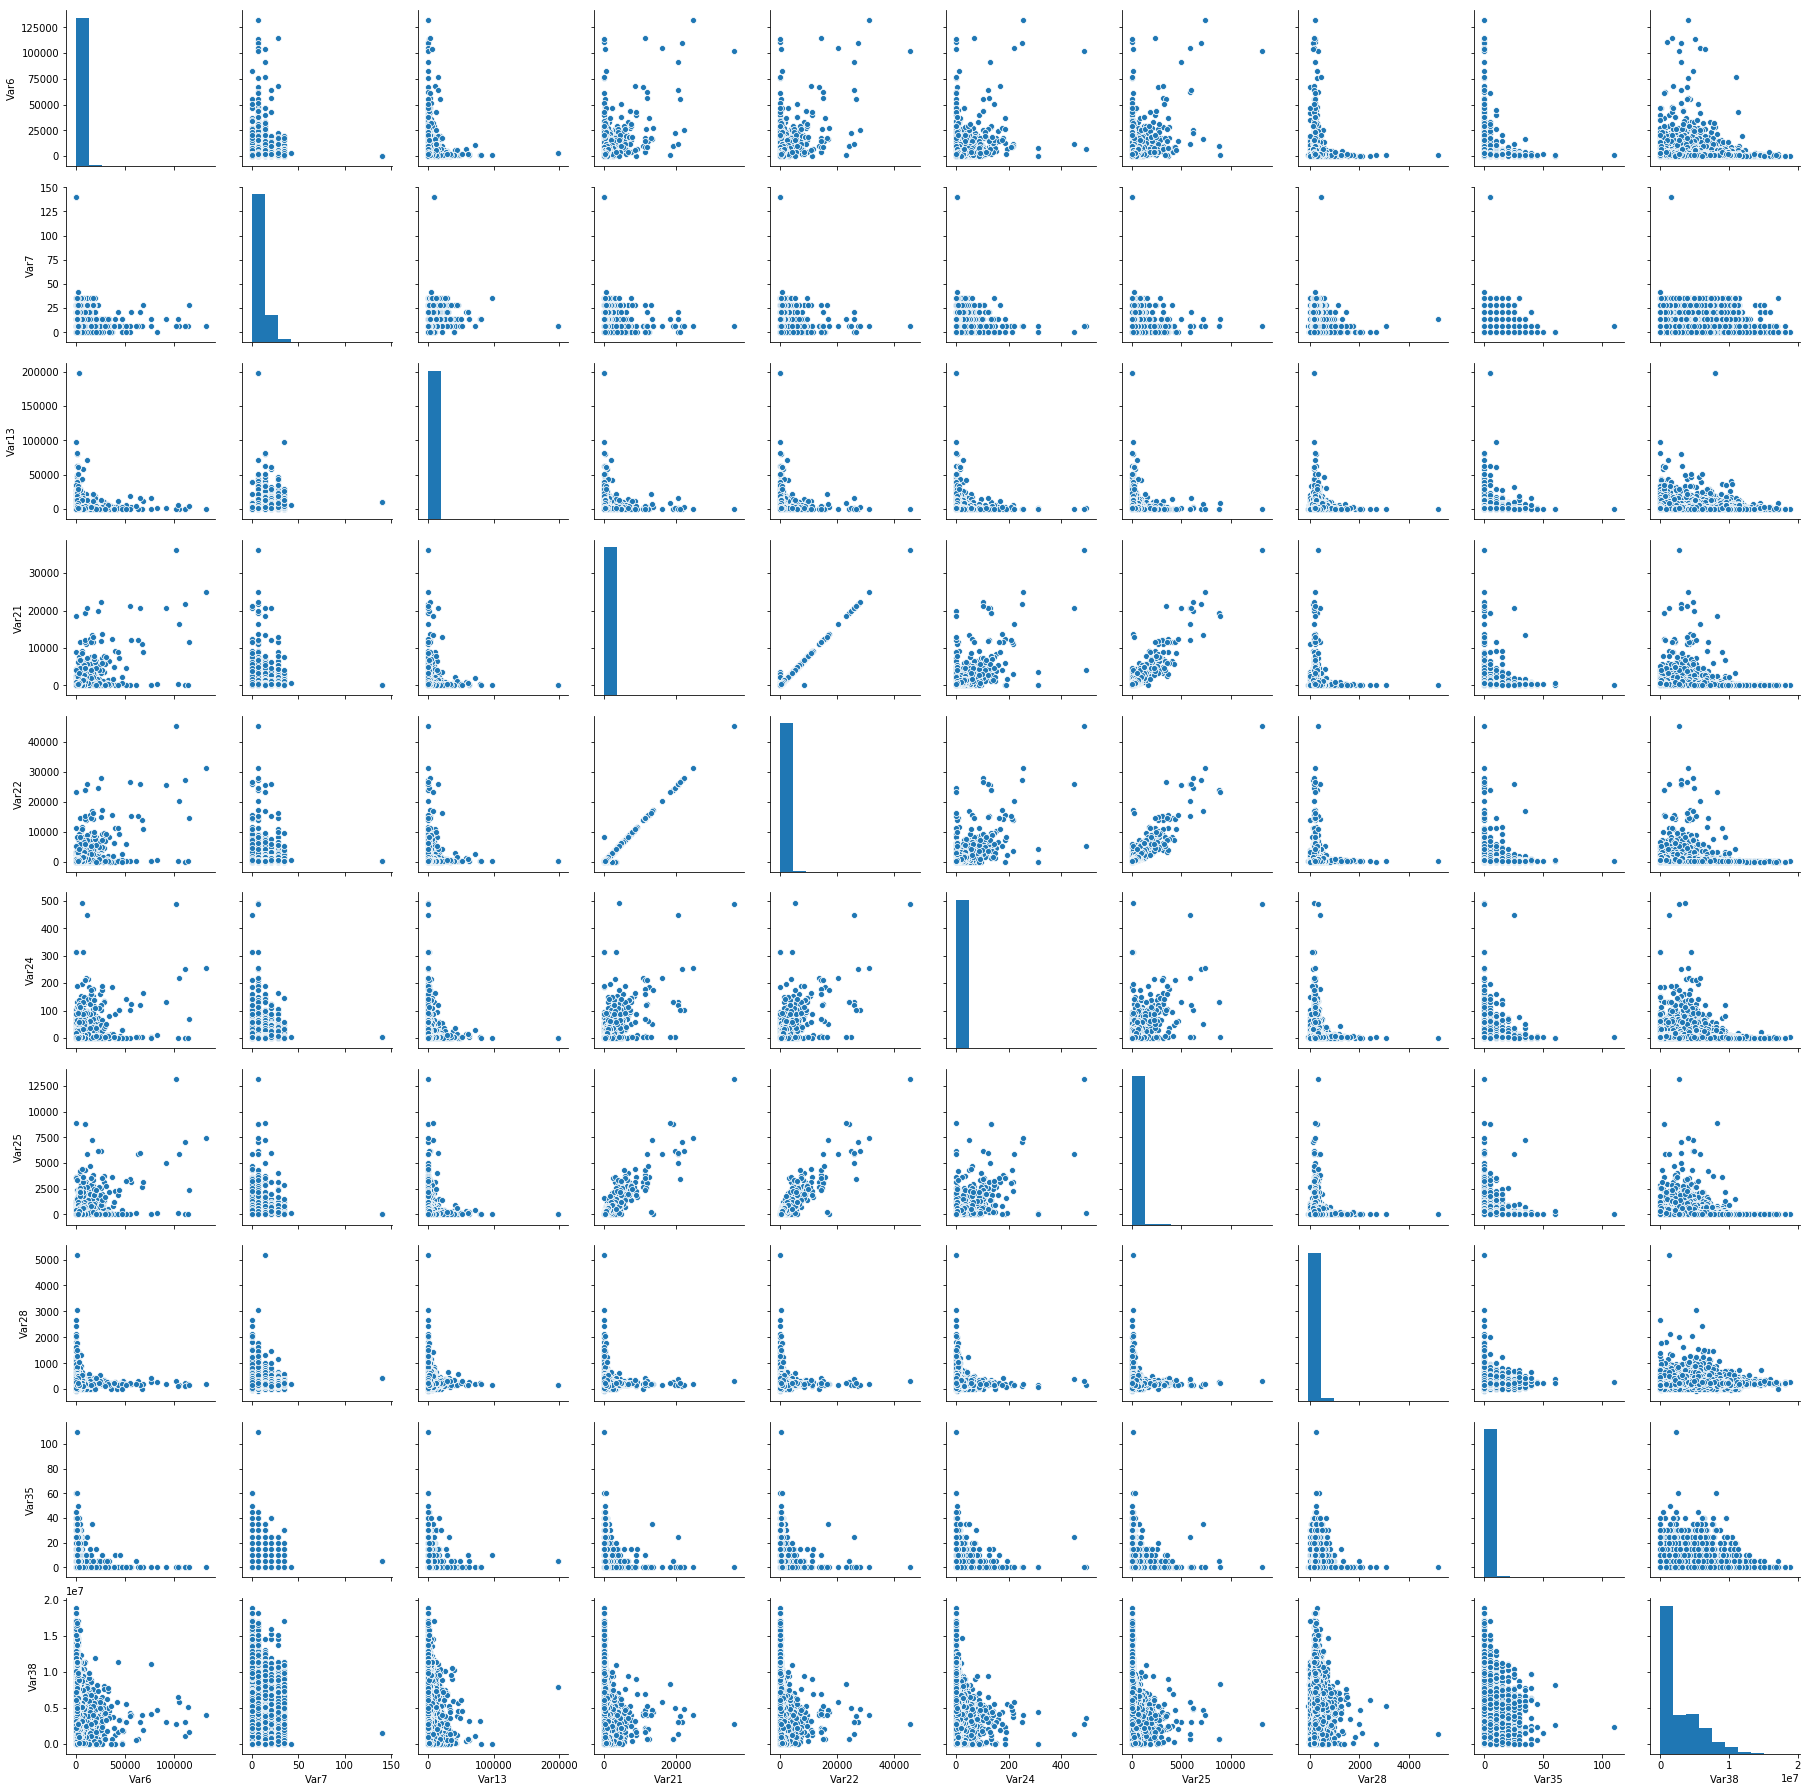

In [43]:
# Visualização pairplot
sns.pairplot(data_complete.iloc[:,0:10])

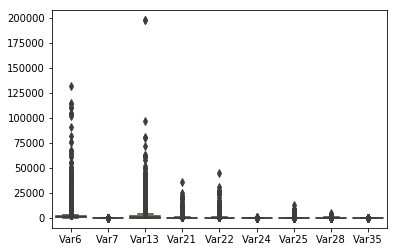

In [44]:
# Boxplot com orientação vertical
sns.boxplot(data = data_complete.iloc[:,0:9], orient = "v")

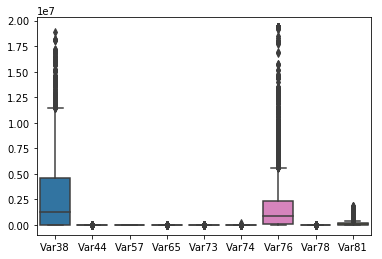

In [45]:
# Boxplot com orientação vertical
sns.boxplot(data = data_complete.iloc[:,9:18], orient = "v")

Como podemos ver, os dados apresentam bastante variância, mais a frente vamos normaliza-los.

## Balanceamento da variável target

Análisando a variável target percebemos que ela apresenta um desbalanceamento pois apresenta muitos resultados negativos e poucos positivos, isso pode causar resultados indesejáveis no nosso modelo, por esse motivo vamos balancear a classe.

In [46]:
data_complete.Appetency_Yes.value_counts()

0    49110
1      890
Name: Appetency_Yes, dtype: int64

Se o imblearn não estiver instalado é só instalar aqui no jupyter com o seguinte código (!pip install imblearn)

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# Balanceamento da target
predictors, target = SMOTE().fit_resample(data_complete.drop(columns='Appetency_Yes'), data_complete['Appetency_Yes'])

# Separando o array em componentes de input e output
X = predictors
Y = target

In [49]:
new_data_complete = pd.DataFrame(predictors)
new_data_complete['197'] = target
new_data_complete.head()

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,5236.0,0.0,0.0,1212.0,0.0,26.0,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [50]:
new_data_complete.shape

(98220, 198)

In [51]:
new_data_complete.columns = [data_complete.iloc[:,0:198].columns]

In [52]:
new_data_complete['Appetency_Yes'] = new_data_complete['Appetency_Yes'].astype(int)

In [53]:
new_data_complete.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Appetency_Yes
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,5236.0,0.0,0.0,1212.0,0.0,26.0,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Resultado do balanceamento da variável target

In [54]:
pd.value_counts(new_data_complete['Appetency_Yes'].values.flatten())

1    49110
0    49110
dtype: int64

## Normalização dos dados

Como falei acima, alguns algoritmos esperam receber os dados normalizados, nessa etapa vamos normaliza-los.

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
# Separando em componentes de input e output
X = new_data_complete.drop(columns='Appetency_Yes')
y = target

In [57]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

### Verificando os dados

#### Sem a normalização :

In [58]:
new_data_complete.drop(columns='Appetency_Yes').head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5236.0,0.0,0.0,1212.0,0.0,26.0,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Feito a normalização :

In [59]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
0,0.011582,0.05,0.000930,0.012792,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003984,0.00,0.000000,0.004632,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.039739,0.05,0.004569,0.033414,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.039739,0.00,0.000000,0.033414,0.000000,0.052632,0.000000,0.017024,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.007810,0.05,0.016253,0.001764,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Criando o modelo de machine learning

Nessa etapa vamos testar vários algoritmos, são eles:
    - LogisticRegression
    - LinearDiscriminantAnalysis(LDA)
    - Naive Bayes(GaussianNB)
    - KNeighborsClassifier(KNN)
    - DecisionTreeClassifier
    - Suporte Vector Machine(SVC)

In [239]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [240]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

In [241]:
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

In [242]:
# Avaliando cada modelo em um loop
resultados = []
nomes = []

LR: 66.795968 (0.053309)
LDA: 67.278558 (0.071607)
NB: 54.297495 (0.439083)
KNN: 95.372633 (0.044977)
CART: 97.982081 (0.018444)
SVM: 78.600081 (0.089008)


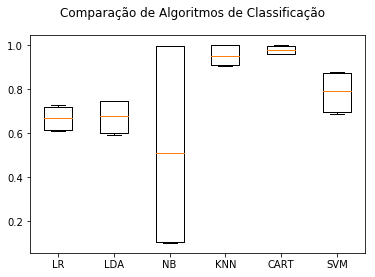

In [243]:
# Loop para executar cada algoritmo, guardar os resultados e apresentar em um Boxplot
for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, (cv_results.mean()*100), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Podemos perceber que os algoritmos KNN e árvore de decisão(CART) tiveram bons resultados, isso pode ser devido aos dois algoritmos se darem bem com alta variância dos dados, além do CART ter como objetivo a redução do Cost Function.

OBS: Devido ao grande volume de variáveis a execução de todos esses algoritmos exigiu bastante capacidade do computador, eu executei essa linha acima do jupyter em 8 horas, claro que fiz isso somente para mostrar que temos outras opções para grandes volumes de variáveis, por exemplo o PCA, veja abaixo.

## Redução de dimensionalidade(PCA)

Outra técnica muito importante e útil é a redução de dimensionalidade. É um método para extração das variáveis importantes (na forma de componentes) a partir de um grande conjunto de variáveis, transformando em pequenos componentes de conjuntos dimensionais, fazendo com que as nossas 197 variáveis se transforme em X componentes, reduzindo tempo de processamento e gerando economia de tempo e custo.

In [60]:
from sklearn.decomposition import PCA

In [81]:
# Seleção de atributos
pca = PCA(n_components = 8)
X_components = pca.fit_transform(X)

In [82]:
X_components

array([[-0.31393172,  0.14792367, -0.85774425, ...,  0.01731215,
         0.11188299,  0.16134838],
       [-0.60304078, -0.05397609, -0.82212701, ...,  0.13837977,
        -0.07811184, -0.29542664],
       [ 1.52297844, -0.19754866, -0.03209989, ...,  0.33199959,
        -0.357169  ,  0.32824628],
       ...,
       [-0.751279  , -0.54772013,  0.54994068, ..., -0.09881756,
         0.1706773 ,  0.01731756],
       [-0.11426053, -0.16141278,  0.61996427, ..., -0.38490542,
        -0.2399177 , -0.10862104],
       [-0.67914095, -0.05122656,  0.39884419, ..., -0.17179265,
         0.01211029, -0.15802657]])

In [83]:
pd.DataFrame(X_components).head()

,0,1,2,3,4,5,6,7
0,-0.313932,0.147924,-0.857744,-0.305005,-0.031593,0.017312,0.111883,0.161348
1,-0.603041,-0.053976,-0.822127,1.228980,0.025259,0.138380,-0.078112,-0.295427
2,1.522978,-0.197549,-0.032100,-0.166398,0.370652,0.332000,-0.357169,0.328246
3,-0.503741,-0.519617,0.527905,-0.289693,0.219910,-0.231176,0.395902,0.605766
4,-0.539406,-0.439536,0.323246,0.638350,-0.735374,0.301019,-0.306028,0.357570


In [88]:
pca.explained_variance_ratio_

array([0.34862785, 0.1360668 , 0.11303865, 0.10152076, 0.09021138,
       0.07975608, 0.07107005, 0.05970843])

## Modelo XGBoost com os dados reduzidos

Caso não esteja instalado o XGBoost na máquina é so instalar pelo comando no jupyter(!pip install xgboost)

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [123]:
# Definindo o número de folds
num_folds = 7
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state=seed)

# Criando o modelo
modelo = XGBClassifier()

# Cross Validation
results_f1 = cross_val_score(modelo, X_components, y, cv=kfold, scoring = 'f1')
results_roc_auc = cross_val_score(modelo, X_components, y, cv=kfold, scoring = 'roc_auc')

# Predict do modelo
y_pred = cross_val_predict(modelo, X_components, y, cv=kfold)

# Report e Mostrando o resultado
report = classification_report(y, y_pred)
print(report)
print("F1: %s" % (results_f1.mean() * 100))
print("ROC AuC: %s" % (results_roc_auc.mean() * 100))
pd.crosstab(y, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79     49110
           1       0.77      0.86      0.81     49110

    accuracy                           0.80     98220
   macro avg       0.80      0.80      0.80     98220
weighted avg       0.80      0.80      0.80     98220

F1: 80.98651313749677
ROC AuC: 89.32511990588587


col_0,0,1
row_0,,
0,36241,12869
1,6934,42176


## Modelo com o Tpot AutoML

Caso não esteja instalado o tpot na máquina é so instalar pelo comando no jupyter(!pip install tpot)

In [133]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [134]:
# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_components, y, test_size=.33, random_state=1)

In [135]:
tpot = TPOTClassifier(
      generations=2,
      population_size=20,
      cv=2,
      n_jobs=-1,
      random_state=1,
      verbosity=2,
      scoring="f1"
  )

In [136]:
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.9242322063587843
Generation 2 - Current best internal CV score: 0.9324991499163748

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=3, min_samples_split=17, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=2,
               disable_update_check=False, early_stop=None, generations=2,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=1, scoring='f1', subsample=1.0,
               template='RandomTree', use_dask=False, verbosity=2,
               warm_start=False)

### Exportanto a Pipeline

In [138]:
tpot.export('pipeline.py')
with open('pipeline.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=1)

# Average CV score on the training set was:0.9324991499163748
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.7000000000000001, min_samples_leaf=3, min_samples_split=17, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



### Executando a Pipeline

In [145]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [142]:
# Criando o modelo
model_tpot = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.7000000000000001,
                                           min_samples_leaf=3, min_samples_split=17, n_estimators=100)

model_tpot.fit(X_train, y_train)
results_tpot = model_tpot.predict(X_test)

In [146]:
# Report e Mostrando o resultado
report = classification_report(y_test, results_tpot)
accuracy = accuracy_score(y_test, results_tpot)
print(report)
print("Acurácia: %s" % (accuracy * 100) )
pd.crosstab(y_test, results_tpot)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     16282
           1       0.96      0.95      0.95     16131

    accuracy                           0.95     32413
   macro avg       0.95      0.95      0.95     32413
weighted avg       0.95      0.95      0.95     32413

Acurácia: 95.36605682905007


col_0,0,1
row_0,,
0,15630,652
1,850,15281


## Modelo Árvore de Decisão(CART) com os dados reduzidos

Vamos testar esse modelo separadamente pois ele apresentou um resultado bem significativo quando testamos todos aqueles algoritmos juntos.

In [126]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

In [127]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = DecisionTreeClassifier()

# Cross Validation
resultado_cart = cross_val_score(modelo, X_components, y, cv = kfold)

# Predict do modelo
y_pred = cross_val_predict(modelo, X_components, y, cv=kfold)

# Report e Mostrando o resultado
report = classification_report(y, y_pred)
print(report)
print("Acurácia: %.3f" % (resultado_cart.mean() * 100))
pd.crosstab(y, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     49110
           1       0.93      0.94      0.93     49110

    accuracy                           0.93     98220
   macro avg       0.93      0.93      0.93     98220
weighted avg       0.93      0.93      0.93     98220

Acurácia: 93.066


col_0,0,1
row_0,,
0,45485,3625
1,3113,45997


## Hyperparameter

O resultado dos algoritmos de árvore de decisão e random forest do tpot foram bastante satisfatórios, porém acredito que podemos melhorar ainda mais o resultado ajustando os Hyperparameter.

Para a otimização(tuning) vamos tentar achar uma combinação entre os parâmetros para melhor a performance do modelo.

Vamos tentar otimizar o algoritmo de árvore de decisão.

### Random Search Parameter Tuning

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [160]:
%%time
# Definindo os valores que serão testados
seed = 7
iterations = 15

# Definindo os valores que serão testados
valores_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                'random_state':[123]}

# Criando o modelo
modelo = DecisionTreeClassifier()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X_components, y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 90.516
Melhores Parâmetros do Modelo:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')
Wall time: 21 s


### Grid Search Parameter Tuning

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
%%time
# Definindo os valores que serão testados
valores_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                'random_state':[123]}

# Criando o modelo
modelo = DecisionTreeClassifier()

# Criando o grid
grid = GridSearchCV(estimator = modelo, 
                    param_grid = valores_grid, 
                    cv=10,
                    n_jobs=-1)
grid.fit(X_components, y)

# Print dos resultados
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 92.670
Melhores Parâmetros do Modelo:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')
Wall time: 20min 16s


# Conclusão

Apesar de todos os valores missing's e por não conhecer muito bem o significado das variáveis, obtivemos um resultado muito bom, os melhores resultados foram com os modelos CART(árvore de decisão), KNN e o RandomForest no Tpot. Poderiamos melhorar ainda mais o modelo mas para isso precisariamos de tempo para processar mais hyperparameters, testar outras técnicas, novas combinações de dados e components no PCA, porém com tudo até aqui o resultado foi bastante satisfatório.

Quando executamos os hyperparameters, não conseguimos achar parâmetros para melhorar o modelo, acredito que com mais alguns testes e mais tempo seria possível melhorar.

## Melhor modelo e Resultado

### RandomForestClassifier

Nesse modelo nossa pipeline dos dados foi:
    - Load dos dados
    - Limpeza e transformações
    - Transformação de dummies
    - Balanceamento da variável target
    - Normalização dos dados
    - Redução de dimensionalidade
    - Criação do modelo no Tpot
    - Execução da Pipeline do modelo
    - Apresentação das métricas

In [192]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [212]:
accuracy = accuracy_score(y_test, results_tpot)
auc = roc_auc_score(y_test, results_tpot)
f1 = f1_score(y_test, results_tpot)

print('Acurácia: {acc}'.format(acc = accuracy))
print('f1_Score: {f1}'.format(f1 = f1))
print('Curva ROC UAC: {roc}'.format(roc = auc))

Acurácia: 0.9536605682905007
f1_Score: 0.9531561876247506
Curva ROC UAC: 0.9536311040019952


In [184]:
pd.crosstab(y_test, results_tpot, rownames=['Valor Real'], colnames=['Valor Predito'])

Valor Predito,0,1
Valor Real,,
0,15630,652
1,850,15281


0 -> Não (O cliente não tem a propensão para comprar um serviço ou um produto da empresa)

1 -> Sim (O cliente tem a propensão para comprar um serviço ou um produto da empresa)